## Step 1: Importing all the necessary libraries



In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import BatchNormalization
import tensorflow as tf
from tensorflow import keras
import numpy as np
from PIL import Image
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import plotly.express as px
import random

##Step 2 : Use Kaggle API to download the dataset from Kaggle directly on the Colab Platform


Please provide your Kaggle API credentials i.e Kaggle's username and Kaggle's key to directly import the dataset from the Kaggle platform. For testing purpose, given below are the credentials for my test account


In [ ]:
#Enter your Kaggle's username on the 'KAGGLE_USERNAME' and Kaggle's key on the 'KAGGLE_KEY'
os.environ['KAGGLE_USERNAME']='learninginnovation'
os.environ['KAGGLE_KEY']='164ee06096a9108c3fe99d8b25025411'

In [ ]:
# Downloads the Multi Cancer dataset from Kaggle directly to the Colab
! kaggle datasets download -d obulisainaren/multi-cancer

 26% 2.27G/8.62G [02:03<08:33, 13.3MB/s]

In [ ]:
#unzip the multi cancer dataset folder
! unzip multi-cancer.zip

##Step 3 : Distribution of the data & Splitting the data into training and testing sets

In [ ]:
#counts the total number of images in the normal kidney folder
total_normal_kidney_files = len(os.listdir("/content/Multi Cancer/Kidney Cancer/kidney_normal/"))
#counts the total number of images in the tumor kidney folder
total_tumor_kidney_files= len(os.listdir("/content/Multi Cancer/Kidney Cancer/kidney_tumor/"))

In [ ]:
#bar graph shows the distribution of data for the total number of files present in the dataset
bar_graph = px.bar(x=['Normal Kidney', 'Tumor Kidney'], y=[total_normal_kidney_files, total_tumor_kidney_files],labels={'x': 'Types', 'y': 'Total images'},
title='Bar graph for total number of files present in the dataset'
)
bar_graph.update_traces(marker_color=['rgb(255, 255, 0)', 'rgb(204, 0, 0)'])

bar_graph.show()

Since the dataset initially is not splitted into training,testing and validation sets, our initial goal is to split the structure of the dataset

In [ ]:
#Below code splits the total number of normal kidney and tumor kidney files into 80:20 ratio for training set and testing set
train_normal_kidney = int(0.8*total_normal_kidney_files)     # 80% for training set in normal kidney class
train_tumor_kidney= int(0.8*total_tumor_kidney_files)        # 80% for training set in tumor kidney class
test_normal_kidney=int(0.2*total_normal_kidney_files)        # 20% for testing set in normal kidney class
test_tumor_kidney=int(0.2*total_tumor_kidney_files)          # 20% for testing set in tumor kidney class

In [ ]:
#bar graph shows the distribution of data in different sets i.e training_normal, training_tumor, testing_normal and testing_tumor
bar_graph_train_test = px.bar(x=['Training set- Normal Kidney','Training set- Tumor Kidney','Testing set- Normal Kidney','Testing set- Tumor Kidney'], y=[train_normal_kidney, train_tumor_kidney,test_normal_kidney,test_tumor_kidney],labels={'x': 'Training & Testing Sets', 'y': 'Total images'},
title='Bar graph for total number of files present in each training and testing dataset'
)
bar_graph_train_test.update_traces(marker_color=['rgb(204, 0, 0)', 'rgb(204, 0, 0)'])
bar_graph_train_test.show()

In [ ]:
# The below code creates a parent directory called "Kidney Cancer" followed by creating sub directories named 'Train' and 'Test'. Each 'Train' and 'Test' folder then contains two child sub directories called 'kidney_normal' and 'kidney_tumor'

parentDir = "Kidney Cancer"
subDirs = ["Train", "Test"]
childDirs = ["kidney_normal", "kidney_tumor"]

# Below code creates a parent directory called "Kidney Cancer"
if not os.path.exists(parentDir):
    os.mkdir(parentDir)

# Below code creates the subdirectories named Train and Test
for sub in subDirs:
    subPath = os.path.join(parentDir, sub)
    if not os.path.exists(subPath):
        os.mkdir(subPath)

# Below code creates two child sub directories named kidney_normal and kidney_tumor within each subdirectory- Train and Test
    for child in childDirs:
        child_path = os.path.join(subPath, child)
        if not os.path.exists(child_path):
            os.mkdir(child_path)

train_dir = os.path.join(parentDir,'Train')
test_dir = os.path.join(parentDir,'Test')
train_normal_dir = os.path.join(train_dir,'kidney_normal')
train_tumor_dir = os.path.join(train_dir,'kidney_tumor')


In [ ]:
#save images from old directory to the newly created parent directory in a splitted manner
for dirName in childDirs:
  for increment in range(1,train_normal_kidney+1):
    imageNum = f"{increment:04}"
    img = Image.open("/content/Multi Cancer/Kidney Cancer/"+dirName+"/"+dirName+"_"+str(imageNum)+".jpg")
    image = img.save(train_dir+"/"+dirName+"/"+dirName+"_"+str(imageNum)+".jpg")


for dirName in childDirs:
  for increment in range(4001,total_normal_kidney_files+1):
    img2 =Image.open("/content/Multi Cancer/Kidney Cancer/"+dirName+"/"+dirName+"_"+str(increment)+".jpg")
    image = img2.save(test_dir+"/"+dirName+"/"+dirName+"_"+str(increment)+".jpg")

In [ ]:
#list few names of the files from the training dataset for each of the classes
train_normal_names = os.listdir(train_normal_dir)
print(train_normal_names[:10])

train_tumor_names = os.listdir(train_tumor_dir)
print(train_tumor_names[:10])

## Step 4 : Data Visualization

In [ ]:
nrows = 8
ncols = 8
plt.figure(figsize=(24,24))

random_images = 8

# Select random images from train normal kidney directory
normal_pic = random.sample(train_normal_names, random_images)
normal_kidney_pic = [os.path.join(train_normal_dir, i) for i in normal_pic]

# Select random images from train normal kidney directory
tumor_pic = random.sample(train_tumor_names, random_images)
tumor_kidney_pic = [os.path.join(train_tumor_dir, i) for i in tumor_pic]

# Merge the selected images into total_images list
total_images = normal_kidney_pic + tumor_kidney_pic

# Print the merged list of images
print(total_images)

for i in range(0,len(total_images)):
  data = total_images[i].split('/',3)[3]
  plot = plt.subplot(8,8,i+1)
  plot.axis('Off')
  image = mpimg.imread(total_images[i])
  plot.set_title(data,fontsize=10)
  plt.imshow(image)

plt.show()



## Step 5 : Data Augmentation and Generators for Training, Testing, and Validation

In [ ]:
trainDatagen = ImageDataGenerator(
    rescale=1./255,
    zoom_range=0.05,
    rotation_range=20,
    horizontal_flip=True,
    validation_split=0.2
)

validDatagen=ImageDataGenerator(rescale=1./255)

testDatagen=ImageDataGenerator(rescale=1./255)

train_generator= trainDatagen.flow_from_directory(train_dir,
                                                   class_mode='binary',
                                                   batch_size=32,
                                                   target_size=(224,224),
                                                   subset='training')
validation_generator= trainDatagen.flow_from_directory(train_dir,
                                                       class_mode='binary',
                                                       batch_size=32,
                                                       target_size=(224,224),
                                                       subset='validation')
test_generator=testDatagen.flow_from_directory(test_dir,
                                                class_mode='binary',
                                                batch_size=32,
                                                target_size=(224,224))

## Determine classes

In [ ]:
train_generator.class_indices

##Build the Convolutional Neural Network Architecure

In [ ]:
model = Sequential()
model.add(Conv2D(32,(3,3),activation = "relu", input_shape = (224,224,3)))
model.add(MaxPooling2D(pool_size = (4,4)))
model.add(Dropout(0.2))
model.add(Conv2D(32,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.3))
model.add(Conv2D(16,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.2))
model.add(Conv2D(16,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.3))
model.add(Conv2D(16,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Flatten())
model.add(Dense(units=256, activation = 'relu'))
model.add(Dense(units=128, activation = 'relu'))

model.add(Dense(units=1, activation = 'sigmoid'))

##Get the summary of the model

In [ ]:
model.summary()

## Display the layers

In [ ]:
keras.utils.plot_model(
    model,
    show_shapes=True,
    show_dtype=True,
    show_layer_names=True,
    rankdir="TB",
    expand_nested=False,
    dpi=96,
    layer_range=None,
    show_layer_activations=True,
)

## Compile the Model

In [ ]:
model.compile(Adam(learning_rate=0.0001),loss='binary_crossentropy',metrics=['accuracy'])

## Implement early stopping to prevent Overfitting

In [ ]:
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)

## Train the CNN model

In [ ]:
history = model.fit(train_generator,
                    epochs = 50,
                    validation_data = validation_generator,
                    callbacks=[early_stopping]
                    )

Epoch 1/50
200/200 [==============================] - 111s 491ms/step - loss: 0.6910 - accuracy: 0.5145 - val_loss: 0.6907 - val_accuracy: 0.5081
Epoch 2/50
200/200 [==============================] - 95s 477ms/step - loss: 0.6536 - accuracy: 0.6169 - val_loss: 0.5343 - val_accuracy: 0.8338
Epoch 3/50
200/200 [==============================] - 96s 479ms/step - loss: 0.5451 - accuracy: 0.7495 - val_loss: 0.4900 - val_accuracy: 0.8394
Epoch 4/50
200/200 [==============================] - 97s 484ms/step - loss: 0.5074 - accuracy: 0.7756 - val_loss: 0.4641 - val_accuracy: 0.8506
Epoch 5/50
200/200 [==============================] - 97s 485ms/step - loss: 0.4857 - accuracy: 0.7864 - val_loss: 0.4617 - val_accuracy: 0.8612
Epoch 6/50
200/200 [==============================] - 95s 475ms/step - loss: 0.4659 - accuracy: 0.7987 - val_loss: 0.4571 - val_accuracy: 0.8481
Epoch 7/50
200/200 [==============================] - 97s 488ms/step - loss: 0.4382 - accuracy: 0.8112 - val_loss: 0.4254 - val_a

## Plot the Training vs Validation loss

Text(0.5, 0, 'epoch')

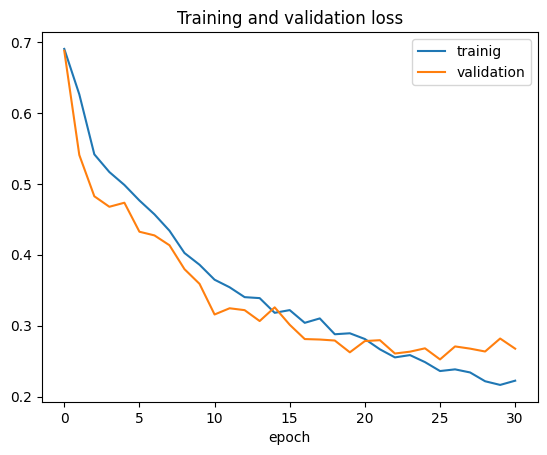

In [33]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['training','validation'])
plt.title('Training and validation loss')
plt.xlabel('epoch')

## Plot the Training Vs Validation accuracy

Text(0.5, 0, 'epoch')

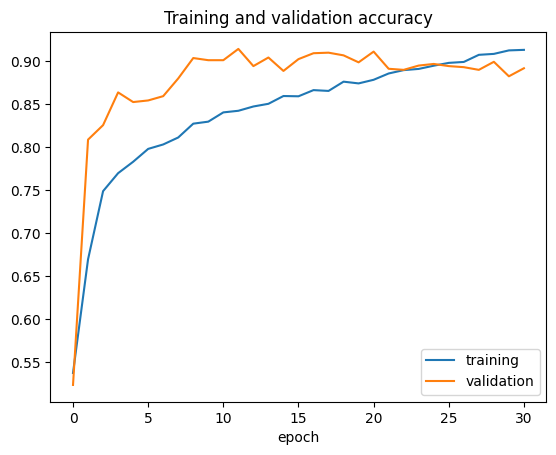

In [34]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training','validation'])
plt.title('Training and validation accuracy')
plt.xlabel('epoch')

## Evaluate the Model

In [35]:
test_loss , test_acc = model.evaluate(test_generator)
print('test acc :{} test loss:{}'.format(test_acc,test_loss))

63/63 [==============================] - 8s 125ms/step - loss: 0.2578 - accuracy: 0.9125
test acc :0.9125000238418579 test loss:0.2577940821647644


In [ ]:
import os
import numpy as np
from tensorflow.keras.preprocessing import image
from sklearn.metrics import classification_report

# Initialize empty lists to store predicted and true labels
y_test = []
y_actual = []

normal_dir = "/content/Kidney Cancer/Test/kidney_normal/"
tumor_dir = "/content/Kidney Cancer/Test/kidney_tumor/"
sum=0
# Define a function to load and preprocess images
def load_and_preprocess_image(img_path):
    img = image.load_img(img_path, target_size=(224, 224))
    img = image.img_to_array(img)
    img = np.expand_dims(img, axis=0)
    img /= 255.0  # Rescale to match the training data preprocessing
    return img

# Iterate through normal images
for i in os.listdir(normal_dir):
    print(i)
    sum=sum+1
    img_path = os.path.join(normal_dir, i)
    img = load_and_preprocess_image(img_path)
    p = model.predict(img)
    predicted_class = 1 if p[0, 0] > 0.5 else 0
    y_test.append(predicted_class)
    y_actual.append(0)  # 0 for normal class

print(sum)

# Iterate through tumor images
for i in os.listdir(tumor_dir):
    img_path = os.path.join(tumor_dir, i)
    img = load_and_preprocess_image(img_path)
    p = model.predict(img)
    predicted_class = 1 if p[0, 0] > 0.5 else 0
    y_test.append(predicted_class)
    y_actual.append(1) #1 for tumor class

print(y_test)
print(y_actual)

In [37]:
y_actual = np.array(y_actual)
y_test = np.array(y_test)

##Generate Confusion Matrix

In [38]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_actual,y_test)


<Axes: >

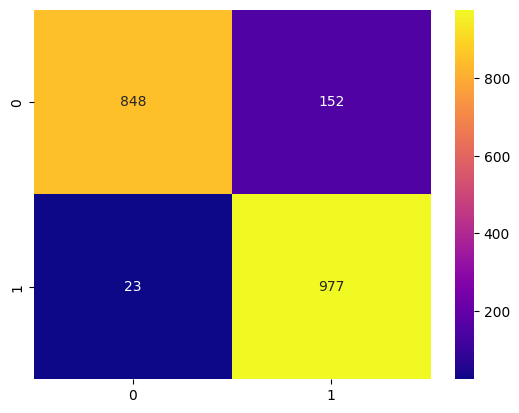

In [39]:
import seaborn as sns
sns.heatmap(cm,cmap='plasma',fmt="d",annot=True)

##Generate Classification Report

In [42]:
from sklearn import metrics
print(metrics.classification_report(y_actual,y_test))

              precision    recall  f1-score   support

           0       0.97      0.85      0.91      1000
           1       0.87      0.98      0.92      1000

    accuracy                           0.91      2000
   macro avg       0.92      0.91      0.91      2000
weighted avg       0.92      0.91      0.91      2000



##Save the Model

In [41]:
model.save('model.h5')
model.save('model.keras')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning:

You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.



## Use the trained model to detect the tumor in an unseen test data

In [ ]:
import numpy as np
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
from google.colab import files
import cv2
uploaded = files.upload()

for fname in uploaded.keys():
      img_path = '/content/' + fname
      img = image.load_img(img_path, target_size=(224, 224))  # Adjust the target size if needed
      img_array = image.img_to_array(img)
      img_array = np.expand_dims(img_array, axis=0)
      img_array /= 255.0  # Rescale to match the training data preprocessing

        # Make predictions using the provided model
      prediction = model.predict(img_array)

        # Determine the class label based on the prediction
      if prediction[0, 0] > 0.5:
          class_label = 'Tumor'
      else:
          class_label = 'Normal'

        # Display the uploaded image and prediction
      plt.imshow(img)
      plt.axis('off')
      plt.title(f'Predicted Class: {class_label}')
      plt.show()